# Simulere populasjoner i tilfeldige verdener
Livet er ikke sikkert. Og det er mange tilfeldigheter som spiller inn på livet til ulike individer innenfor en art. 

I denne simuleringen skal vi prøve å modelere en slik tilfeldighet.
Vi starter i kjent stil med å importere biblioteker, deklarere variabler og lage lister vi kommer til å trenge:


In [1]:
# imporerer bibliotek
import matplotlib.pyplot as plt
import random 

# Deklarerer variabler til populasjonen:
n0=10
K=1000 #bæreevne, om vi ønsker å gjøre 
r=0.05  # utganspunktet for vekstraten

# Variabler som styrer simulasjonen: 
dt=1  #tidsteg, om denne er 1, så arbeider vi med 1 og 1år
makstid=100 # makstid for antall simuleringer

# Vi oppretter og fyller lister med initialbetingelser:
n=[n0]#populasjonstørrelsen
t=[dt]#Tiden








### Vekstrate i tilfeldige systemer
I stokastiske, *tilfeldige*, system har vi den stokastiske vekstraten s.

<br>
$s(N)=r - \frac{1}{2}  \sigma_e^2 - \frac{1}{2N} \sigma_d^2$

Vekstraten er i utganspunktet den vanlige vekstraten *r* som påvirkes av to andre ledd. <br>

Det ene tilsvarer miljøvariasjon, $\frac{1}{2}  \sigma_e^2$ , med e for *enviroment*, dette er endringer i nedbør, temperatur og klima generellt. <br>
Den andre kommer av demografisk variasjon $ \frac{1}{2N} \sigma_d^2$, dette er flaks/uflaks på individ nivå. Vi ser at denne har en faktor $\frac{1}{N}$, det vil si at flaks på individnivå har lite å si for større populasjoner enn for mindre.
<br>


$ \sigma^2$ er variasjonen i miljø eller demografi. 

**Nedenfor er en funksjon som regner ut den stokastiske vekstraten et år**



In [2]:
 
def s(n,r,sigma_miljø,sigma_demo):
    """ Regner ut den stokastiske vekstraten for et øyeblikk. Denne er tilfeldig, og avhenger av antall i arten, vekstraten, og miljø og demografisk stokastitet"""
    s= r - 1/2 * random.normalvariate(0,sigma_miljø)- (1/(2*n))*random.normalvariate(0,sigma_demo)
    #print(s) #om man vil skrive ut de tilfeldige s'ene.
    return s

Nå har vi:
1. Initialbetingelsene på plass
2. En funksjon for å se hvordan tilfeldigheter påvirker arten.
Vi kan nå gjennomføre en simulering for å se om en art vil overleve eller om den vil bli utryddet.

Vi sier at en art utryddes om populasjonen kommer under *flaskehalsen* til arten. Under denne verdien vil effektene av f.eks inavvl bli for stor slik at arten ikke kan redde seg inn. 

Her kan vi velge hvor mye miljø og demografi skal påvirke arten vår ved å gi endringMiljø og endringDemografisk en verdi. 
 

#### Kjør programmet nedenfor. Vi satt at miljøet skal endre seg lite, med 0.05, ser du effektene av dette i plottet?

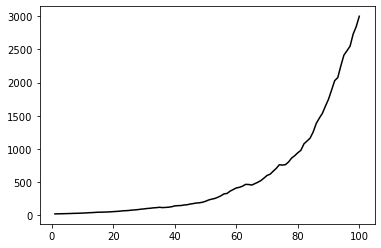

In [33]:

flaskehals=4

endringMiljø=0.05
endringDemografisk=0

while t[-1] < makstid and n[-1]>flaskehals:
    st=s(n[-1],r,endringMiljø,endringDemografisk)
    #n.append(n[-1]+n[-1]*st*(1-n[-1]/K)*dt) #med bæreevne
    n.append(n[-1]+n[-1]*st*dt) # uten bæreevne
    t.append(t[-1]+dt)
if n[-1]<flaskehals :
    #populasjonen er mindre enn flaskehalsen, og den dør ut.
    plt.plot(t,n,c="red") 
else :
    plt.plot(t,n,c="black") 
n=[n0]
t=[dt]


plt.show()

**Oppgave: 1** Gradvis øk hvor mye miljøet endrer seg. <br>
Hvordan endrer figuren over populasjonen seg for arten? Noter ned det du finner. 

**Oppgave: 2** Hva er miljøvariansen når du først får utryddninger?


*hint:* En utdødd populasjon gis rød plot-farge. 

**Oppgave: 3** Hvor sansynlig er det at det blir utdrydninger ved miljøvariansen du fant i oppgave 2?

*hint:* Endre på koden slik at du gjør fler enn en test samtidig

*hint: 2* Endre på koden slik at du teller antall utdødninger


Hvor mange ganger må du simulere for å kunne si noe om sannsynligheten for utryddelse?


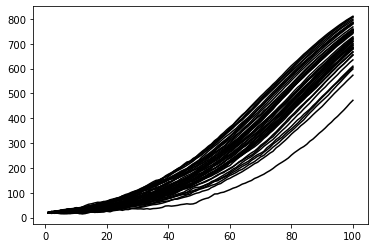

In [32]:
antall_simuleringer=50
flaskehals=10

endringMiljø=0
endringDemografisk=4

#skriver over n0 og n[0], for å teste hvordan demografisk stokastistet påvirkes av utganspopulasjonen
n0=20
n[0]=n0

for i in range(antall_simuleringer):
    while t[-1] < makstid and n[-1]>flaskehals:
        st=s(n[-1],r,endringMiljø,endringDemografisk)
        n.append(n[-1]+n[-1]*st*(1-n[-1]/K)*dt) #med bæreevne
        #n.append(n[-1]+n[-1]*st*dt) # uten bæreevne
        t.append(t[-1]+dt)
    if n[-1]<flaskehals :
        plt.plot(t,n,c="red") 
    else :
        plt.plot(t,n,c="black") 
    n=[n0]
    t=[dt]


plt.show()

Andre utforskninger: 

Hvordan demografisk stokastitet påvirkes av populasjons størrelsen. 
Logistisk vekst med stokastiske varabler.
